<a href="https://colab.research.google.com/github/thiagopereiramagalhaes/Analise_de_Dados_de_Vendas_de_Cafe_Estudo_de_Caso/blob/main/Analise_de_Dados_de_Vendas_de_Cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor:** Thiago Pereira Magalhães

**Turma:** Engenharia e Análise de DADOS - 2025.2

**Data de criação:** 25/10/2025

**Data da última alteração:** 02/11/2025

# Análise de Dados de Vendas de Café


## Entendimento do negócio

**Descrição do dataset:**  "Este conjunto de dados contém cerca de 3.530 transações de vendas de café registradas em uma cafeteria. Ele fornece informações sobre detalhes do cliente e da transação, como horário da compra, método de pagamento, tipo de bebida e valor gasto."

**Descrição dos dados:**
- **hora_do_dia**: A hora em que a compra ocorreu
- **metodo_de_pagamento:** Método de pagamento utilizado
- **valor_gasto:** A quantia de dinheiro gasto na compra
- **nome_do_cafe:** O tipo de café ou bebida adquirida
- **turno_do_dia:** O turno do dia quando a compra foi realizada
- **dia_da_semana:** O dia da semana em que a transação ocorreu
- **nome_do_mes:** O mês em que a transação foi registrada
- **dia_da_semana_posicao:** Classificação em ordem numérica dos dias da semana
- **posicao_do_mes:** Classificação em ordem numérica do mês
- **data:** Data que ocorreu a transação

**Link do dataset:** [População mundial por país 2025 (mais recente)](https://www.kaggle.com/datasets/asadullahcreative/world-population-by-country-2025)


## Entendimento dos Dados

In [ ]:
import kagglehub

__dataset = kagglehub.dataset_download("anassarfraz13/coffee-sales-dataset")

Using Colab cache for faster access to the 'coffee-sales-dataset' dataset.


In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/coffee-sales-dataset/Coffe_sales.csv')

In [ ]:
df.head(2)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000


In [ ]:
df.tail(2)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000
3546,18,card,35.76,Latte,Night,Sun,Mar,7,3,2025-03-23,18:11:38.635000


In [ ]:
__df_columns_rename = {
    'hour_of_day':'hora_do_dia',
    'cash_type':'metodo_de_pagamento',
    'money':'valor_gasto',
    'coffee_name':'nome_do_cafe',
    'Time_of_Day':'turno_do_dia',
    'Weekday':'dia_da_semana',
    'Month_name':'nome_do_mes',
    'Weekdaysort':'dia_da_semana_posicao',
    'Monthsort':'posicao_do_mes',
    'Date':'data',
    'Time': 'hora'
       }

df.rename(columns=__df_columns_rename, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hora_do_dia            3547 non-null   int64  
 1   metodo_de_pagamento    3547 non-null   object 
 2   valor_gasto            3547 non-null   float64
 3   nome_do_cafe           3547 non-null   object 
 4   turno_do_dia           3547 non-null   object 
 5   dia_da_semana          3547 non-null   object 
 6   nome_do_mes            3547 non-null   object 
 7   dia_da_semana_posicao  3547 non-null   int64  
 8   posicao_do_mes         3547 non-null   int64  
 9   data                   3547 non-null   object 
 10  hora                   3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
df.describe()

,hora_do_dia,valor_gasto,dia_da_semana_posicao,posicao_do_mes
count,3547.00,3547.00,3547.00,3547.00
mean,14.19,31.65,3.85,6.45
std,4.23,4.88,1.97,3.50
min,6.00,18.12,1.00,1.00
25%,10.00,27.92,2.00,3.00
50%,14.00,32.82,4.00,7.00
75%,18.00,35.76,6.00,10.00
max,22.00,38.70,7.00,12.00


**Resumo:** O conjunto de dados analisado consiste em 3.547 registros (transações) e 11 variáveis (colunas). O dataset está completo, sem valores nulos (missing values) identificados em nenhuma coluna. Os dados estão estruturados com 7 colunas do tipo object (indicando dados textuais ou categóricos) e 4 colunas numéricas (3 int64 e 1 float64).

**Top insights:**
  - O **desvio padrão** do **valor_gasto** é de apenas **RS4,88** para uma **média de RS 31,65**. Isso pode indicar que o valor gasto de cada transação é muito consistente.
  - O dataset parece apresentar produtos com preços similares. **O mínimo é RS18,12** e **o máximo é RS38,70**, próximos da **média que é RS31,65**. Isso pode indicar que **o dataset não possui outliers**.
  - **50% das vendas** ocorrem entre as **10h da manhã e as 18h da tarde**. As vendas são distribuídas de forma bastante simétrica ao longo do dia.
  - Para **dia_da_semana_posicao**, a **média 3.85** e a **mediana 4.00** estão exatamente no centro da semana. Os dados parecem estar bem distribuídos de segunda a domingo. O mesmo padrão ocorre para os meses, com a **média 6.45** e a **mediana 7.00** estão muito próximas do centro do ano.

**Questões-Chave:**
  - Quais são os Top 3 cafés em termos de receita total e volume de vendas?
  - Qual é a distribuição de vendas ao longo do dia (hora_do_dia)? Existem horários de pico?
  - Qual o comportamento de vendas por dia da semana (dia_da_semana)? O faturamento é maior em dias úteis ou fins de semana?
  - Existe sazonalidade nas vendas ao longo dos meses (nome_do_mes)?
  - Existiu uma evolução nos valores ao longo do tempo?
  

## Preparação dos dados

In [ ]:
df.metodo_de_pagamento.replace({'card': 'Cartao'}, inplace=True)

df.turno_do_dia.replace({'Morning': 'Manha', 'Afternoon':'Tarde', 'Night':'Noite'}, inplace=True)

df.dia_da_semana.replace({'Mon':'Segunda', 'Tue':'Terca', 'Wed':'Quarta', 'Thu':'Quinta', 'Fri':'Sexta', 'Sat':'Sabado', 'Sun':'Domingo'}, inplace=True)

df.nome_do_mes.replace({'Mar':'Marco', 'Apr':'Abril', 'May':'Maio', 'Jun':'Junho', 'Jul':'Julho', 'Aug':'Agosto', 'Sep':'Setembro', 'Oct':'Outubro', 'Nov':'Novembro','Dec':'Dezembro', 'Jan':'Janeiro', 'Feb':'Fevereiro'}, inplace=True)

/tmp/ipython-input-961059853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.metodo_de_pagamento.replace({'card': 'Cartao'}, inplace=True)
/tmp/ipython-input-961059853.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

## Análise Exploratória dos Dados

### Estrutura dos dados

In [ ]:
df.head(5)

,hora_do_dia,metodo_de_pagamento,valor_gasto,nome_do_cafe,turno_do_dia,dia_da_semana,nome_do_mes,dia_da_semana_posicao,posicao_do_mes,data,hora
0,10,Cartao,38.7,Latte,Manha,Sexta,Marco,5,3,2024-03-01,10:15:50.520000
1,12,Cartao,38.7,Hot Chocolate,Tarde,Sexta,Marco,5,3,2024-03-01,12:19:22.539000
2,12,Cartao,38.7,Hot Chocolate,Tarde,Sexta,Marco,5,3,2024-03-01,12:20:18.089000
3,13,Cartao,28.9,Americano,Tarde,Sexta,Marco,5,3,2024-03-01,13:46:33.006000
4,13,Cartao,38.7,Latte,Tarde,Sexta,Marco,5,3,2024-03-01,13:48:14.626000


In [ ]:
df.hora_do_dia.sort_values().unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [ ]:
df.metodo_de_pagamento.unique()

array(['Cartao'], dtype=object)

In [ ]:
df.nome_do_cafe.unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [ ]:
df.turno_do_dia.unique()

array(['Manha', 'Tarde', 'Noite'], dtype=object)

In [ ]:
df.dia_da_semana.unique()

array(['Sexta', 'Sabado', 'Domingo', 'Segunda', 'Terca', 'Quarta',
       'Quinta'], dtype=object)

In [ ]:
df.nome_do_mes.unique()

array(['Marco', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro',
       'Outubro', 'Novembro', 'Dezembro', 'Janeiro', 'Fevereiro'],
      dtype=object)

In [ ]:
df.data.sort_values().unique().min()

'2024-03-01'

In [ ]:
df.data.sort_values().unique().max()

'2025-03-23'

In [ ]:
import matplotlib.pyplot as plt

### Quais são os pordutos mais vendidos?

In [ ]:
total_produtos_vendidos = df.nome_do_cafe.value_counts()
receita_total_por_produto = df.groupby('nome_do_cafe').valor_gasto.sum()

produtos_mais_vendidos = pd.concat([total_produtos_vendidos, receita_total_por_produto],axis=1)

produtos_mais_vendidos.columns = ['volume_de_vendas', 'receita_total']
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='receita_total', ascending=False)

produtos_mais_vendidos

,volume_de_vendas,receita_total
nome_do_cafe,,
Latte,757,26875.30
Americano with Milk,809,24751.12
Cappuccino,486,17439.14
Americano,564,14650.26
Hot Chocolate,276,9933.46
Cocoa,239,8521.16
Cortado,287,7384.86
Espresso,129,2690.28


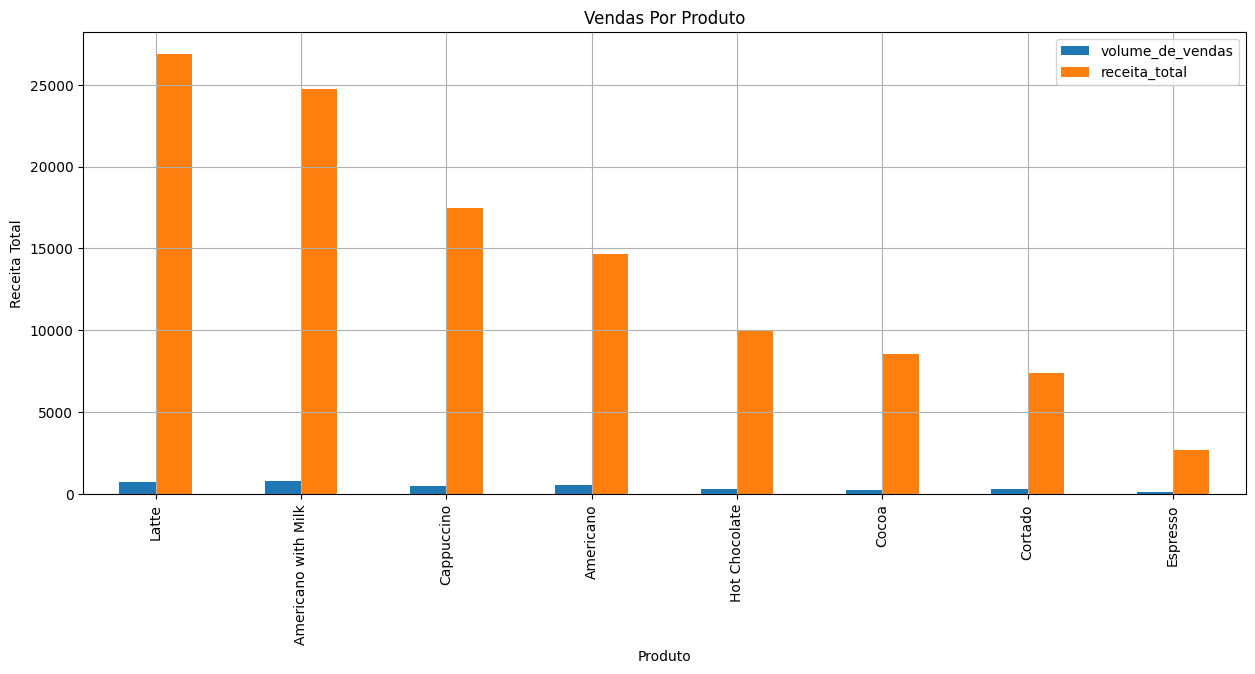

In [ ]:
produtos_mais_vendidos.plot(kind='bar', figsize=(15,6))
plt.title('Vendas Por Produto')
plt.xlabel('Produto')
plt.ylabel('Receita Total')
plt.grid(True)
plt.show()

### Quais são as horas com maior movimento?

In [ ]:
total_vendido_por_hora = df.hora_do_dia.value_counts()
receita_total_por_hora = df.groupby('hora_do_dia').valor_gasto.sum()

horas_com_maior_movimento = pd.concat([total_vendido_por_hora, receita_total_por_hora], axis=1)
horas_com_maior_movimento.columns = ['volume_de_vendas', 'receita_total']

horas_com_maior_movimento = horas_com_maior_movimento.sort_values(by='receita_total', ascending=False)

horas_com_maior_movimento

,volume_de_vendas,receita_total
hora_do_dia,,
10,328,10198.52
16,278,9031.84
11,283,8453.10
19,229,7751.96
17,237,7659.76
15,236,7476.02
12,241,7419.62
9,242,7264.28
14,225,7173.80


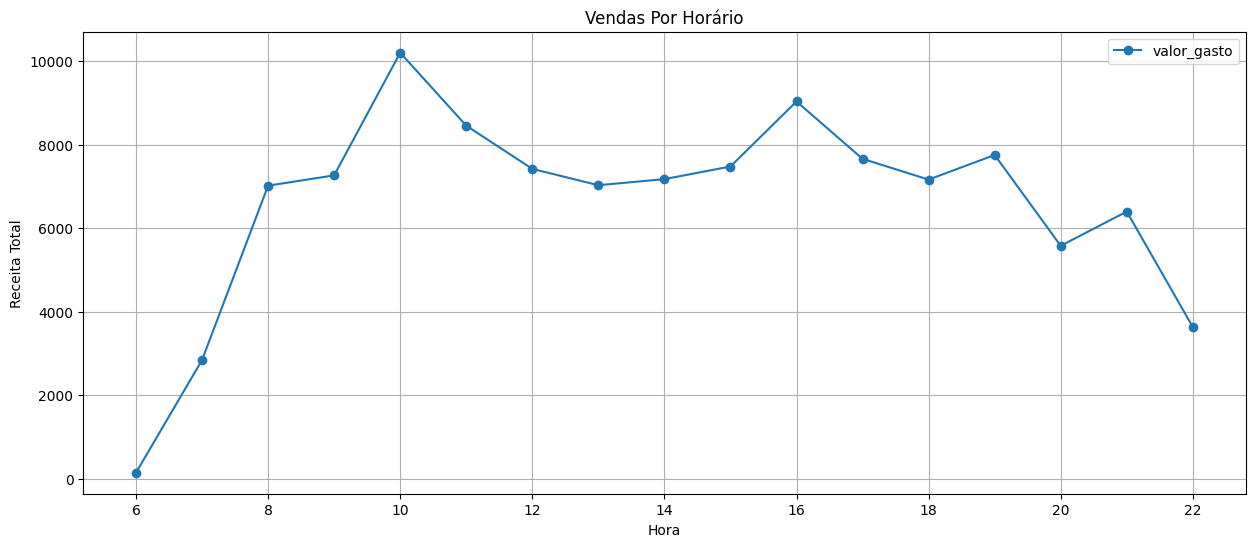

In [ ]:
df[['hora_do_dia','valor_gasto']].groupby('hora_do_dia').sum().reset_index().sort_values(by='hora_do_dia', ascending=True).plot(x='hora_do_dia', y='valor_gasto', kind='line', figsize=(15,6), marker='o')

plt.title('Vendas Por Horário')
plt.xlabel('Hora')
plt.ylabel('Receita Total')
plt.grid(True)
plt.show()

### Quais são os dias da semana com maior movimento?

In [ ]:
total_vendido_por_dia = df.dia_da_semana.value_counts()
receita_total_por_dia = df.groupby('dia_da_semana').valor_gasto.sum()
dias_com_maior_movimento = pd.concat([total_vendido_por_dia, receita_total_por_dia], axis=1)
dias_com_maior_movimento.columns = ['volume_de_vendas', 'receita_total']
dias_com_maior_movimento

,volume_de_vendas,receita_total
dia_da_semana,,
Terca,572,18168.38
Segunda,544,17363.10
Sexta,532,16802.66
Quinta,510,16091.40
Quarta,500,15750.46
Sabado,470,14733.52
Domingo,419,13336.06


In [ ]:
receita_diaria = df.groupby('data')['valor_gasto'].sum().reset_index()
receita_diaria.columns = ['Data', 'Valor Gasto Total']

receita_diaria['Valor Gasto Total'].mean()

np.float64(294.6078215223097)

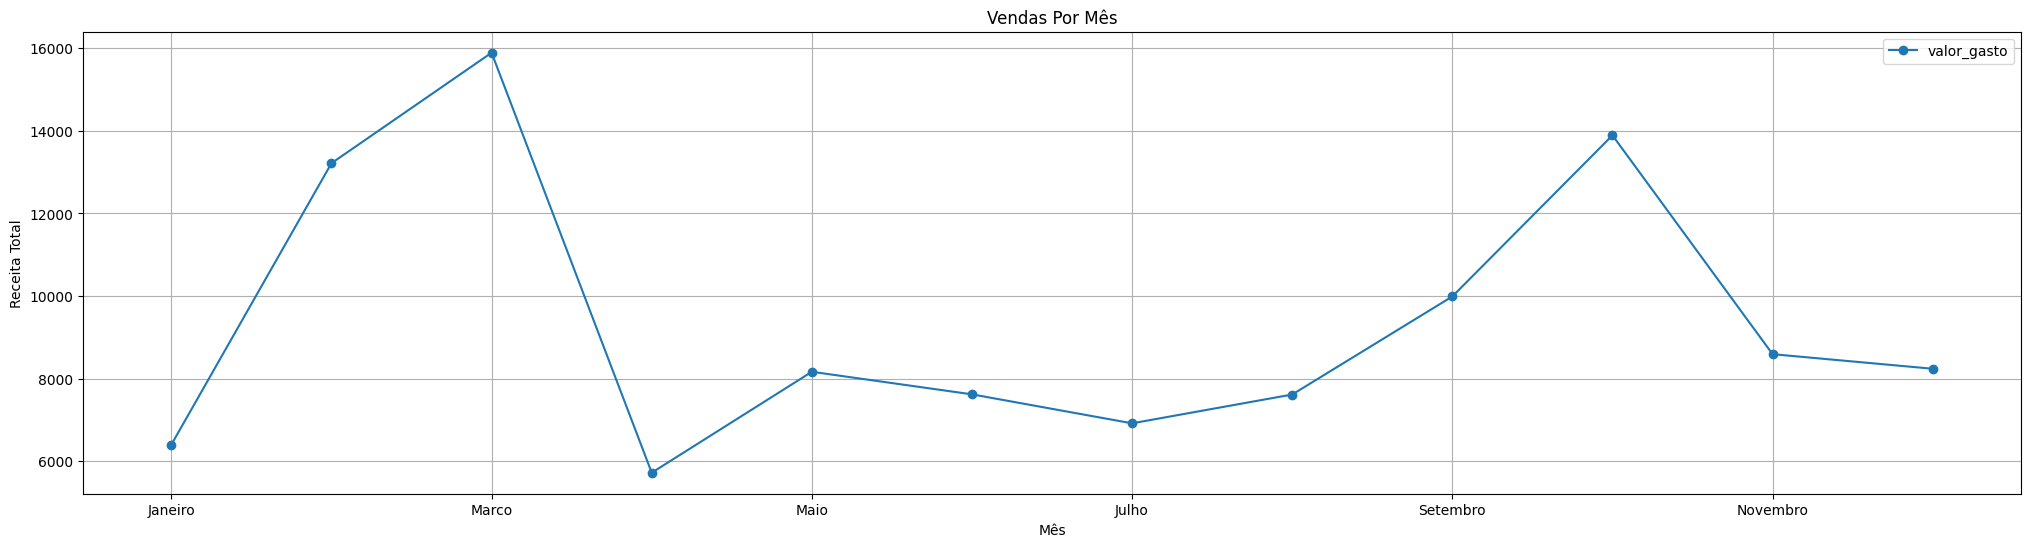

In [ ]:
meses_com_maior_movimento = df.groupby('nome_do_mes').agg({
    'valor_gasto': 'sum',
    'posicao_do_mes': 'first'
}).reset_index().sort_values(by='posicao_do_mes', ascending=True)

meses_com_maior_movimento.plot(x='nome_do_mes', y='valor_gasto', kind='line', figsize=(25,6), marker='o')

plt.title('Vendas Por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.grid(True)
plt.show()

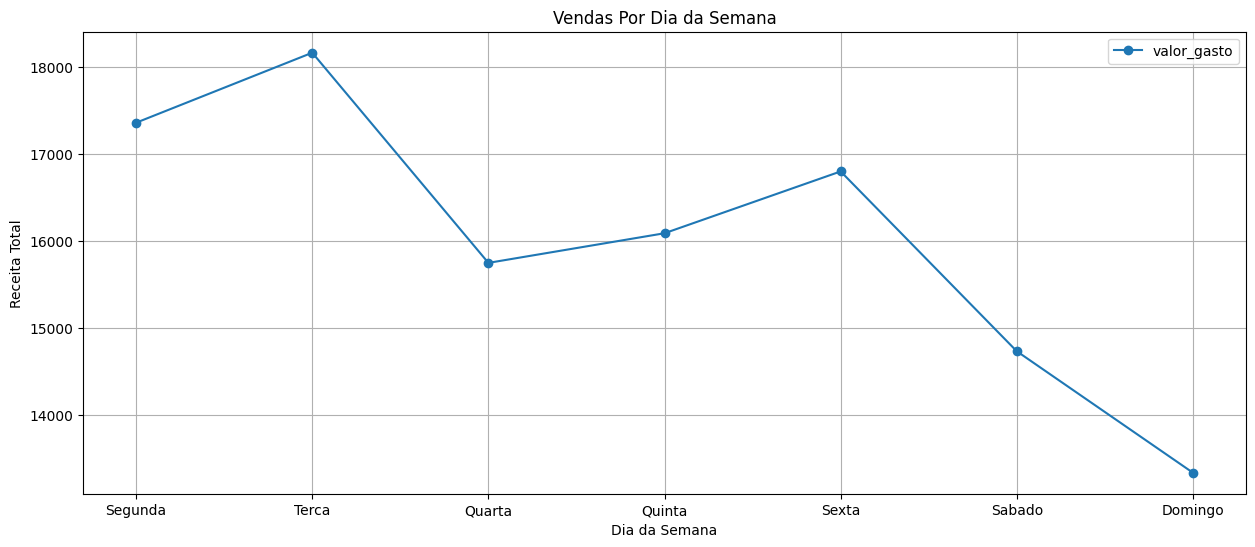

In [ ]:
df.groupby('dia_da_semana').agg({
    'valor_gasto': 'sum',
    'dia_da_semana_posicao': 'first'
}).reset_index().sort_values(by='dia_da_semana_posicao', ascending=True).plot(x='dia_da_semana', y='valor_gasto', kind='line', figsize=(15,6), marker='o')

plt.title('Vendas Por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Receita Total')
plt.grid(True)
plt.show()

### Quais são os meses com maior movimento?

In [ ]:
total_vendido_por_mes = df.nome_do_mes.value_counts()
receita_total_por_mes = df.groupby('nome_do_mes').valor_gasto.sum()

meses_com_maior_movimento = pd.concat([total_vendido_por_mes, receita_total_por_mes], axis=1)
meses_com_maior_movimento.columns = ['volume_de_vendas', 'receita_total']

meses_com_maior_movimento = meses_com_maior_movimento.sort_values(by='receita_total', ascending=False)

meses_com_maior_movimento

,volume_de_vendas,receita_total
nome_do_mes,,
Marco,494,15891.64
Outubro,426,13891.16
Fevereiro,423,13215.48
Setembro,344,9988.64
Novembro,259,8590.54
Dezembro,259,8237.74
Maio,241,8164.42
Junho,223,7617.76
Agosto,272,7613.84


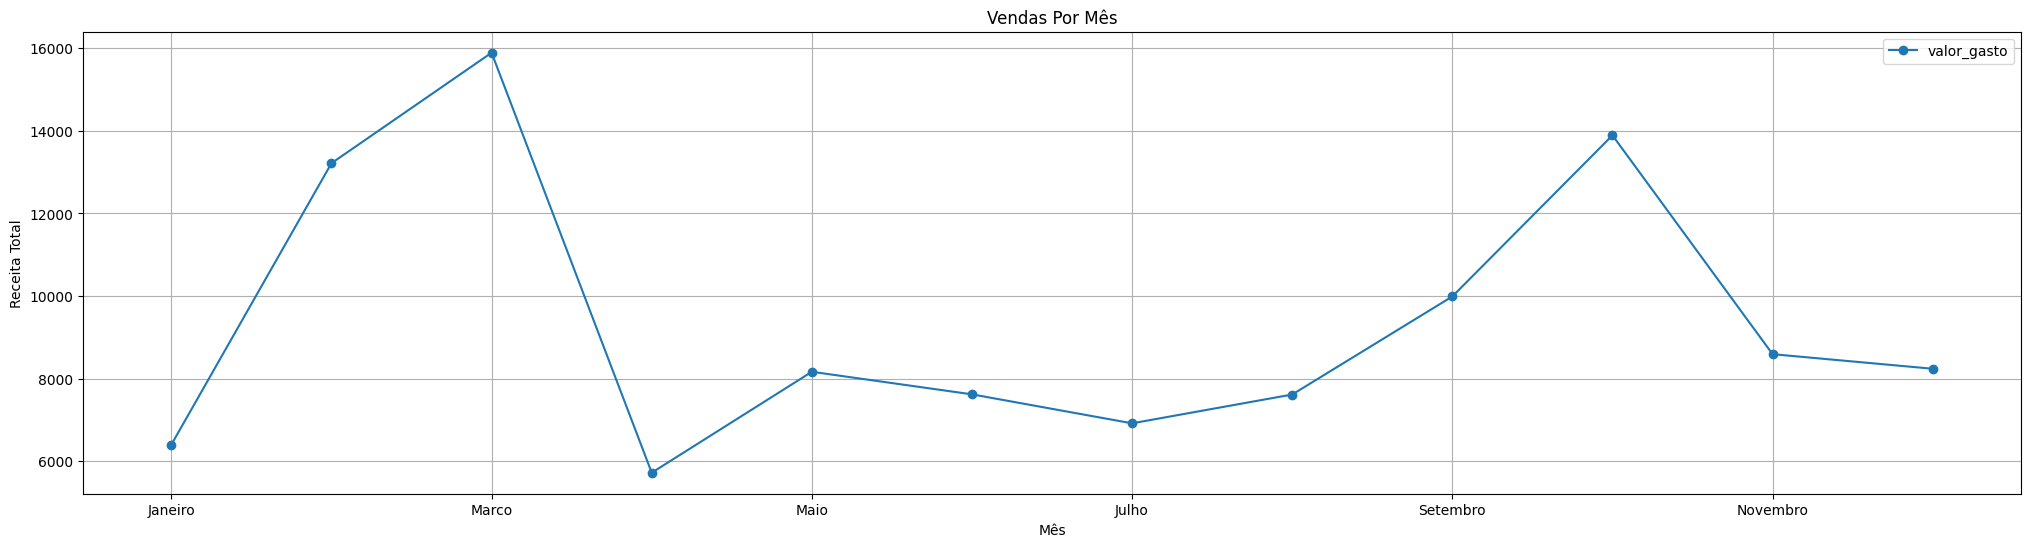

In [ ]:
df.groupby('nome_do_mes').agg({
    'valor_gasto': 'sum',
    'posicao_do_mes': 'first'
}).reset_index().sort_values(by='posicao_do_mes', ascending=True).plot(x='nome_do_mes', y='valor_gasto', kind='line', figsize=(25,6), marker='o')

plt.title('Vendas Por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.grid(True)
plt.show()

### Qual o ticket médio da receita?

In [ ]:
ticket_medio_da_receita_para_12_meses = meses_com_maior_movimento.receita_total.sum() / meses_com_maior_movimento.volume_de_vendas.sum()

ticket_medio_da_receita_para_12_meses

np.float64(31.645215675218495)

## Conclusão da Análise

A análise exploratória do dataset de vendas de café revelou insights importantes sobre o comportamento de compra dos clientes. Observei que os produtos Latte e Americano com Leite são os que geram maior receita, apesar do Americano com Leite ter o maior volume de vendas. A distribuição das vendas ao longo do dia mostra picos entre 10h da manhã e 16h da tarde, indicando maior movimento. Em relação aos dias da semana, a Terça-feira seguida da Segunda-feira se destacam como os dias com maior receita. A análise mensal sugere que Março, Outubro e Fevereiro são os meses com maior faturamento, enquanto Janeiro e Abril apresentam os menores valores de receita. O ticket médio da receita para o período analisado é de aproximadamente R$ 31,65, o que, juntamente com o baixo desvio padrão do valor gasto, reforça a consistência nos preços dos produtos.